# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the Cars Data file

In [3]:
cardata = pd.read_csv("cars.csv")

In [4]:
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [5]:
cardata.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [6]:
cardata.shape

(398, 9)

In [7]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
cardata.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [9]:
# Check for missing value
cardata.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [10]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
cardata[cardata['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [11]:
cardata['hp'].replace("?",np.nan, inplace=True)

In [12]:
# Now try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median 
import seaborn as sns
hp = cardata['hp'].dropna()
hp.count()

392

C:\Users\anupa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

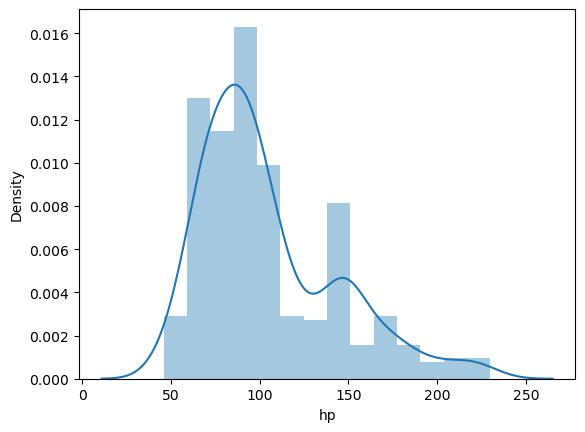

In [13]:
sns.distplot(pd.to_numeric(hp))

In [14]:
# Since this does not look to be normally distributed, let us impute by using median
cardata['hp'].fillna((cardata['hp'].median()), inplace=True)
cardata['hp'] = cardata['hp'].astype('float')

In [15]:
cardata.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

Perform bi variate analysis including correlation, pairplots

In [16]:
cardata.corr(method='kendall')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.686477,-0.679847,-0.673377,-0.694006,0.301096,0.413661,0.467249
cyl,-0.686477,1.000000,0.794854,0.682006,0.735481,-0.367194,-0.273742,-0.551610
disp,-0.679847,0.794854,1.000000,0.711556,0.800508,-0.352110,-0.218920,-0.570074
hp,-0.673377,0.682006,0.711556,1.000000,0.696368,-0.482267,-0.274888,-0.402494
wt,-0.694006,0.735481,0.800508,0.696368,1.000000,-0.268619,-0.196863,-0.496185
acc,0.301096,-0.367194,-0.352110,-0.482267,-0.268619,1.000000,0.196024,0.173055
yr,0.413661,-0.273742,-0.218920,-0.274888,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.402494,-0.496185,0.173055,0.136967,1.000000


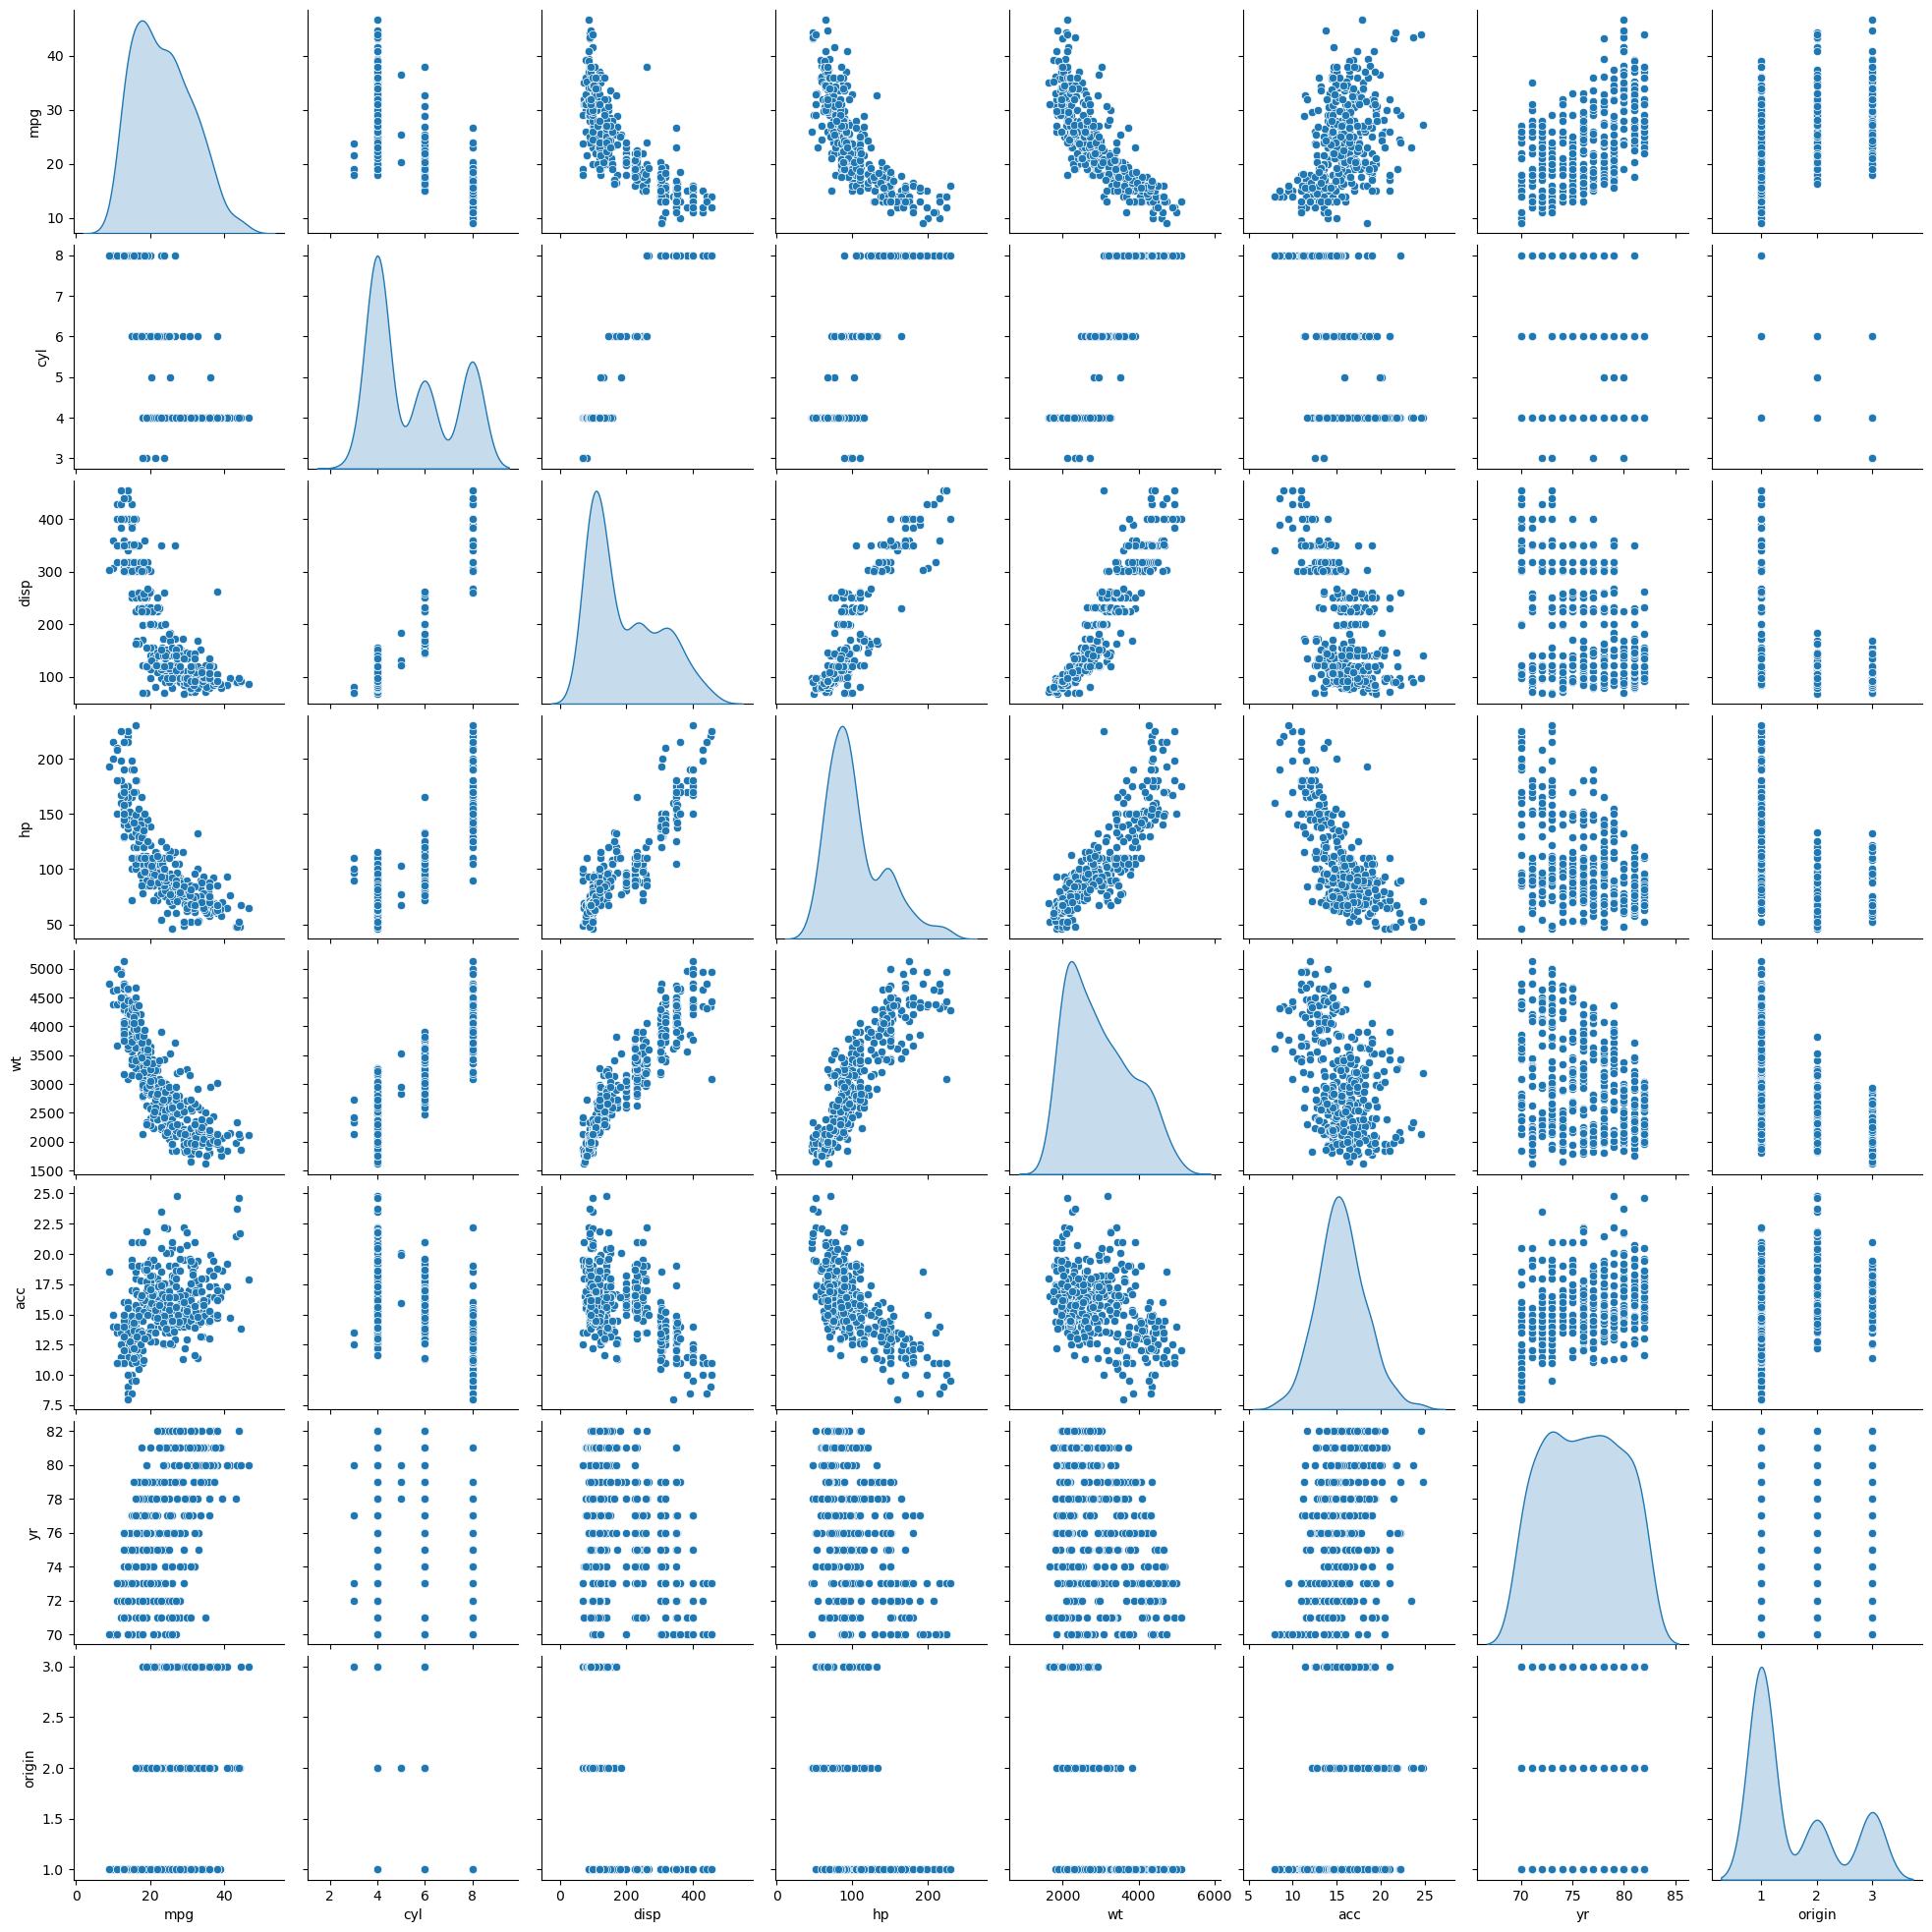

In [17]:
sns.pairplot(cardata,diag_kind='kde')

In [18]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl and disp shows 3 clusters while wt shows 2

# from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
# (correlation too gives high negative correlation)
# Cyl too shows negative correlation with levels

In [19]:
cardata.groupby(cardata['cyl']).mean()

,mpg,disp,hp,wt,acc,yr,origin
cyl,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.286765,109.796569,78.654412,2308.127451,16.601471,77.073529,1.985294
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.985714,218.142857,101.410714,3198.226190,16.263095,75.928571,1.190476
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [20]:
# Further dig into data shows max mpg is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
# subtract year from 83 to get the age
# Other continuous variables should be checked for outliers and should be normlized using z-score

In [21]:
# Calculate age of vehicle
cardata['age'] = 83-cardata['yr']
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13


In [22]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(cardata['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
cardata = cardata.join(one_hot)
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13,1,0,0


In [23]:
# Let us now remove duplicate/irrelevant columns

cars_new = cardata.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


Create new data frame with standardize variables and imputation for any missing/outliers

In [24]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

<AxesSubplot:>

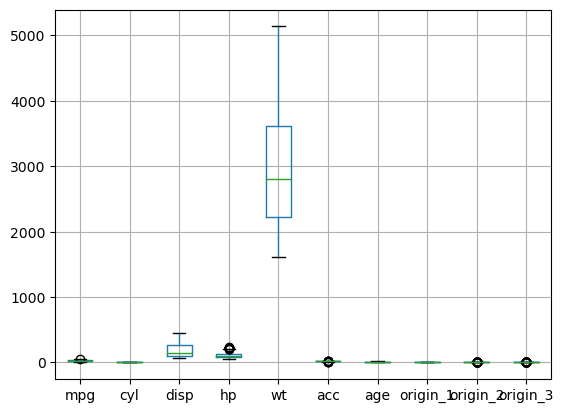

In [25]:
cars_new.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e65745d550>,
 'caps': [<matplotlib.lines.Line2D at 0x1e65745daf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e65745d280>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6574640d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6574643a0>],
 'means': []}

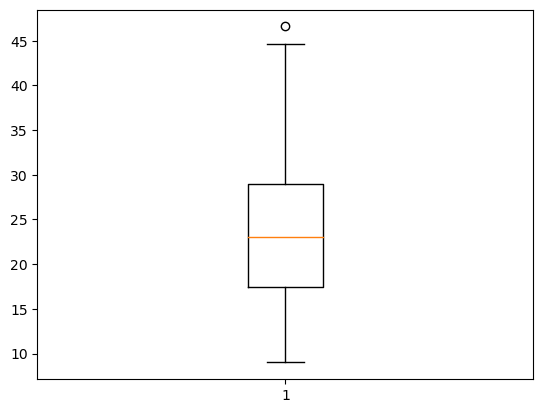

In [26]:
# We could see some outliers for mpg,hp and acc
plt.boxplot(cars_new['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6574a82b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6574a8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e65749dfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6574a8df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6574b4100>],
 'means': []}

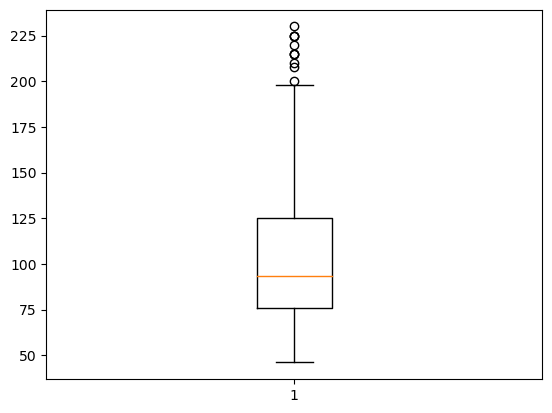

In [27]:
plt.boxplot(cars_new['hp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6574fbf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e65750b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6574fbca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e65750baf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e65750bdc0>],
 'means': []}

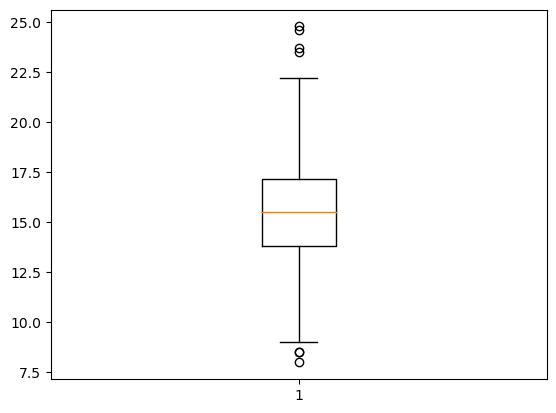

In [28]:
plt.boxplot(cars_new['acc'])

In [29]:
# Let us take logaritmic transform for hp,mpg and acc to remove outliers
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,2.890372,8,307.0,4.867534,3504,2.484907,13,1,0,0
1,2.708050,8,350.0,5.105945,3693,2.442347,13,1,0,0
2,2.890372,8,318.0,5.010635,3436,2.397895,13,1,0,0
3,2.772589,8,304.0,5.010635,3433,2.484907,13,1,0,0
4,2.833213,8,302.0,4.941642,3449,2.351375,13,1,0,0


<AxesSubplot:>

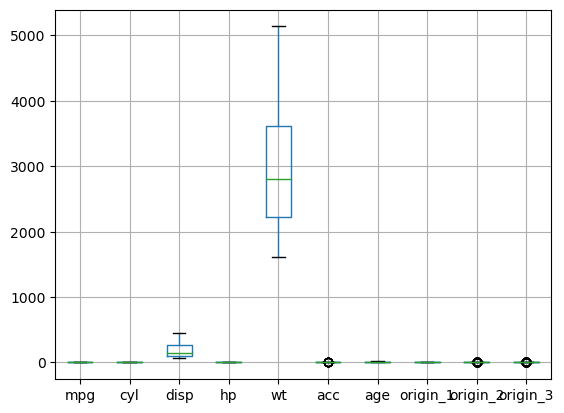

In [30]:
cars_new.boxplot()

In [31]:
# This looks better.
# Now let us try to scale the variables
from scipy.stats import zscore

cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)


In [32]:
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.622035,1.498191,1.090604,0.823608,0.630870,-1.353748,1.627426,1,0,0
1,-1.159493,1.498191,1.503514,1.523992,0.854333,-1.589535,1.627426,1,0,0
2,-0.622035,1.498191,1.196232,1.243998,0.550470,-1.835805,1.627426,1,0,0
3,-0.969242,1.498191,1.061796,1.243998,0.546923,-1.353748,1.627426,1,0,0
4,-0.790530,1.498191,1.042591,1.041316,0.565841,-2.093533,1.627426,1,0,0


Create appropriate clusters with the new data set

In [33]:
# Variables are now scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

C:\Users\anupa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,num_clusters,cluster_errors
0,1,3000.226131
1,2,1435.661694
2,3,1072.434353
3,4,873.977856
4,5,787.068831
5,6,722.292274
6,7,676.440280
7,8,630.119743
8,9,597.036777
9,10,560.359444


Identify the appropriate clusters

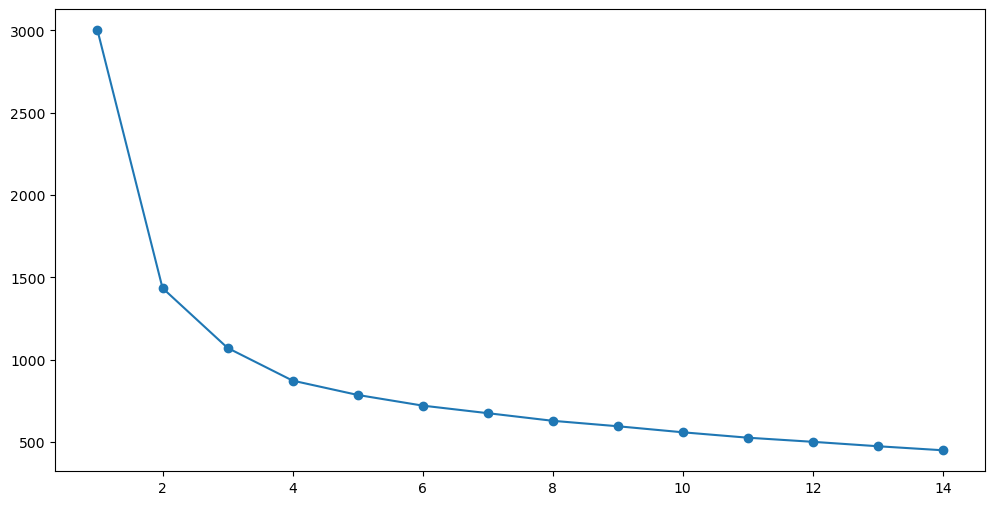

In [34]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [35]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

Check for no of values in each cluster and centers for each variables

In [36]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 94 117  96  91]


In [37]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

,0,1,2,3
mpg,-1.306300e+00,1.080530,0.337373,-0.395798
cyl,1.498191e+00,-0.821104,-0.868584,0.424430
disp,1.503923e+00,-0.773034,-0.824059,0.309735
hp,1.442656e+00,-0.799132,-0.545073,0.112262
wt,1.404098e+00,-0.748370,-0.770282,0.324409
acc,-1.150226e+00,0.426220,0.308195,0.315020
age,6.883238e-01,-1.087358,0.657116,-0.006206
origin_1,1.000000e+00,0.410256,0.250000,0.912088
origin_2,-2.498002e-16,0.188034,0.468750,0.032967
origin_3,8.326673e-17,0.401709,0.281250,0.054945


In [ ]:
# Group 1 has highest values for mpg while 3rd has lowest
# Group 0 has max no of cylinders and 2 forms of lower cylinder values
# As seen in correlation and pairplot, Group 0 has highest values for hp,wt and displ
# Group 1 seems to be comprising of newest cars
# Group 3 and 0 seems to be originated at point 3, while 2 in 2nd point and 1 again at point 3

Assign the groups created above to data frame and study the characteristics for each group.

In [38]:
# Add cluster number to original cars data

predictions = kmeans.predict(cars_new)
predictions
cardata["group"] = predictions
cardata['group'] = cardata['group'].astype('category')
cardata.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
car_name      object
age            int64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

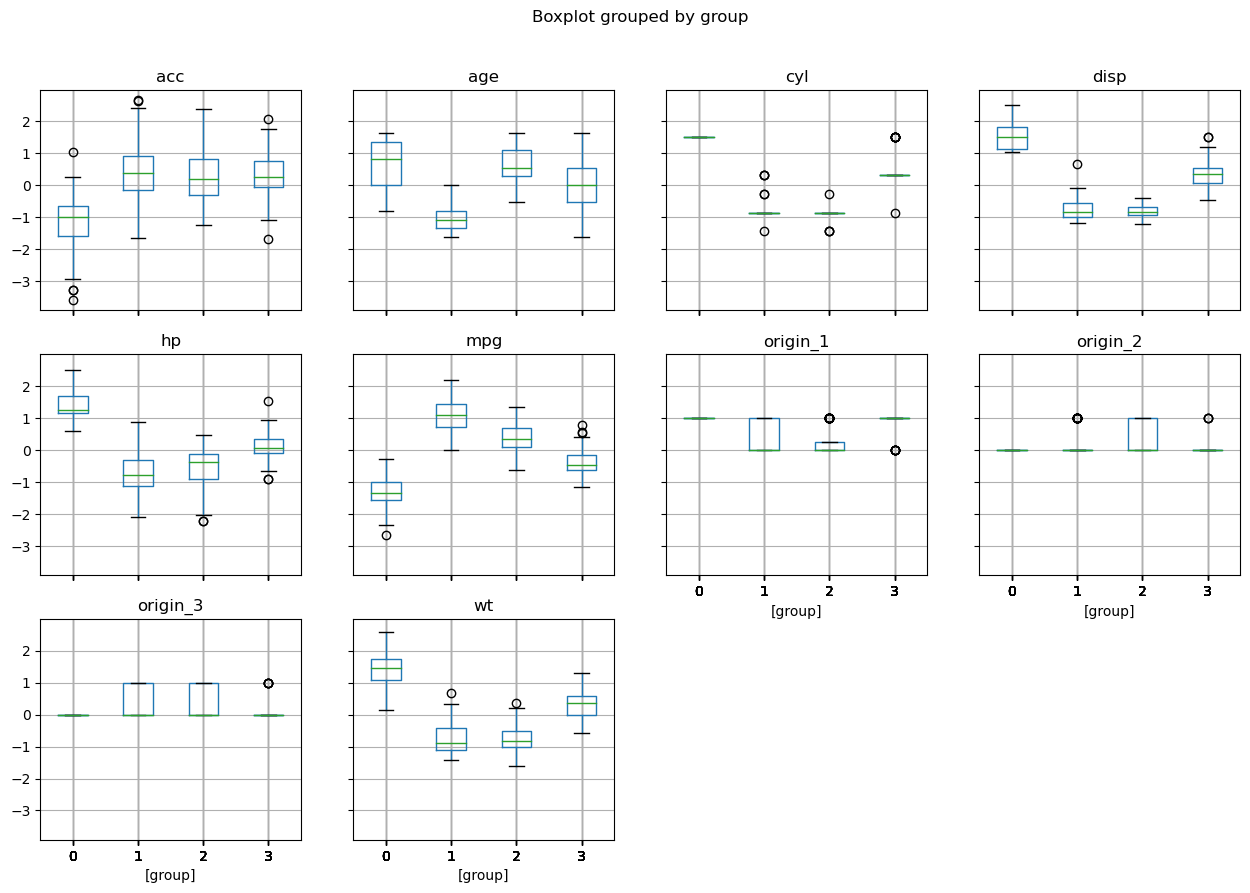

In [39]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [ ]:
# Group 0 is characterised by lower acc, comparitely old models, higher wt, hp but lowest mpg with origin at 1
# Group 1 -Highest mpg, lower wt and hp. Lower age limits suggest comparitevly newer cars. Origin looks more 2
# Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration
# Group 3 - Again slighlty higher in wt origin code as 1. Better performance in terms of mpg